### Pair XII
# Random Forest

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Librerías para la visualización de los datos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------
pd.options.display.max_columns = None


- En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

- En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal y a un Decision Tree. El objetivo de hoy es:

  - Ajustar el modelo a un Random Forest

  - Extraer las métricas

  - Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [2]:
df = pd.read_pickle("../data/10_metricas.pkl")
df.head(2)

,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,continente_oe
0,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96,3
1,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01,3


In [3]:
df.duplicated().sum()

0

In [4]:
df.index

RangeIndex(start=0, stop=4787, step=1)

In [5]:
df.reset_index(drop=True)

,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,continente_oe
0,586.350,1.602857,3.5475,1.592,10.406667,37.7500,14.770,4.900,4.280,73.760,2.8340,1.250,17607.475,7.960,0.010,57.370,319.8075,1844.180,7.960,3
1,1382.830,3.862857,4.3575,2.022,17.230000,77.7925,38.950,8.380,3.490,1356.630,7.8800,1.170,19957.900,16.740,0.030,64.760,1537.2925,13253.985,5.010,3
2,483.190,2.548571,6.5800,1.650,9.430000,54.5075,21.285,3.180,2.220,132.740,2.6620,0.790,26734.235,30.450,0.110,80.120,613.7650,1981.745,9.150,3
3,419.020,2.475000,3.0475,1.498,11.493333,49.1750,26.970,5.480,2.650,254.890,3.0920,1.380,20592.315,38.020,0.150,97.450,820.1275,3066.240,7.800,3
4,2672.230,7.647857,5.1825,2.728,21.986667,70.2475,36.415,9.420,3.390,384.010,11.0520,1.410,27749.865,22.060,0.160,176.240,1424.5550,16340.420,3.470,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,3435.180,3.699286,4.1600,3.188,28.390000,68.1250,30.345,11.400,25.480,835.558,22.6520,1.410,13956.520,41.910,0.200,105.460,797.7800,4498.330,5.800,1
4783,2471.400,4.742143,6.2675,2.980,32.126667,115.5075,42.365,5.300,9.890,176.530,23.4440,1.620,24714.020,56.490,0.250,129.450,1068.0000,1888.860,5.000,2
4784,5588.530,5.855286,5.9080,4.258,36.533333,65.5030,44.778,13.544,10.400,1635.222,22.9200,1.352,22737.246,72.658,0.168,156.284,2265.3070,4318.334,5.168,1
4785,1540.604,3.738429,2.1635,2.806,16.430000,62.2650,25.940,7.780,8.306,462.710,12.3052,1.010,33087.090,27.630,0.106,77.830,402.1375,2107.646,8.400,0


In [6]:
X = df.drop("salario", axis = 1)
y = df["salario"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
param = {"max_depth": [11, 12], 
        "max_features": [7, 8], 
        "min_samples_split": [11, 12],
        "min_samples_leaf": [56, 57]} 
#n_estimators: [50] (normalmente es 100)

In [9]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(n_estimators=50), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            #verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [10]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=50),
             param_grid={'max_depth': [11, 12], 'max_features': [7, 8],
                         'min_samples_leaf': [56, 57],
                         'min_samples_split': [11, 12]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [11]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=12, max_features=8, min_samples_leaf=57,
                      min_samples_split=12, n_estimators=50)

In [12]:
param = {"max_depth": [12], 
        "max_features": [6], 
        "min_samples_split": [11],
        "min_samples_leaf": [56]} 

In [13]:
#gs_rf = GridSearchCV(#para hacer combinaciones de hiperparámetros          

In [14]:
gs_rf = RandomForestRegressor(
        max_depth = 12, 
        max_features = 6, 
        min_samples_split = 11,
        min_samples_leaf = 56)

In [15]:
gs_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, max_features=6, min_samples_leaf=56,
                      min_samples_split=11)

In [16]:
bosque = gs_rf

  0%|          | 0/100 [00:00<?, ?it/s]

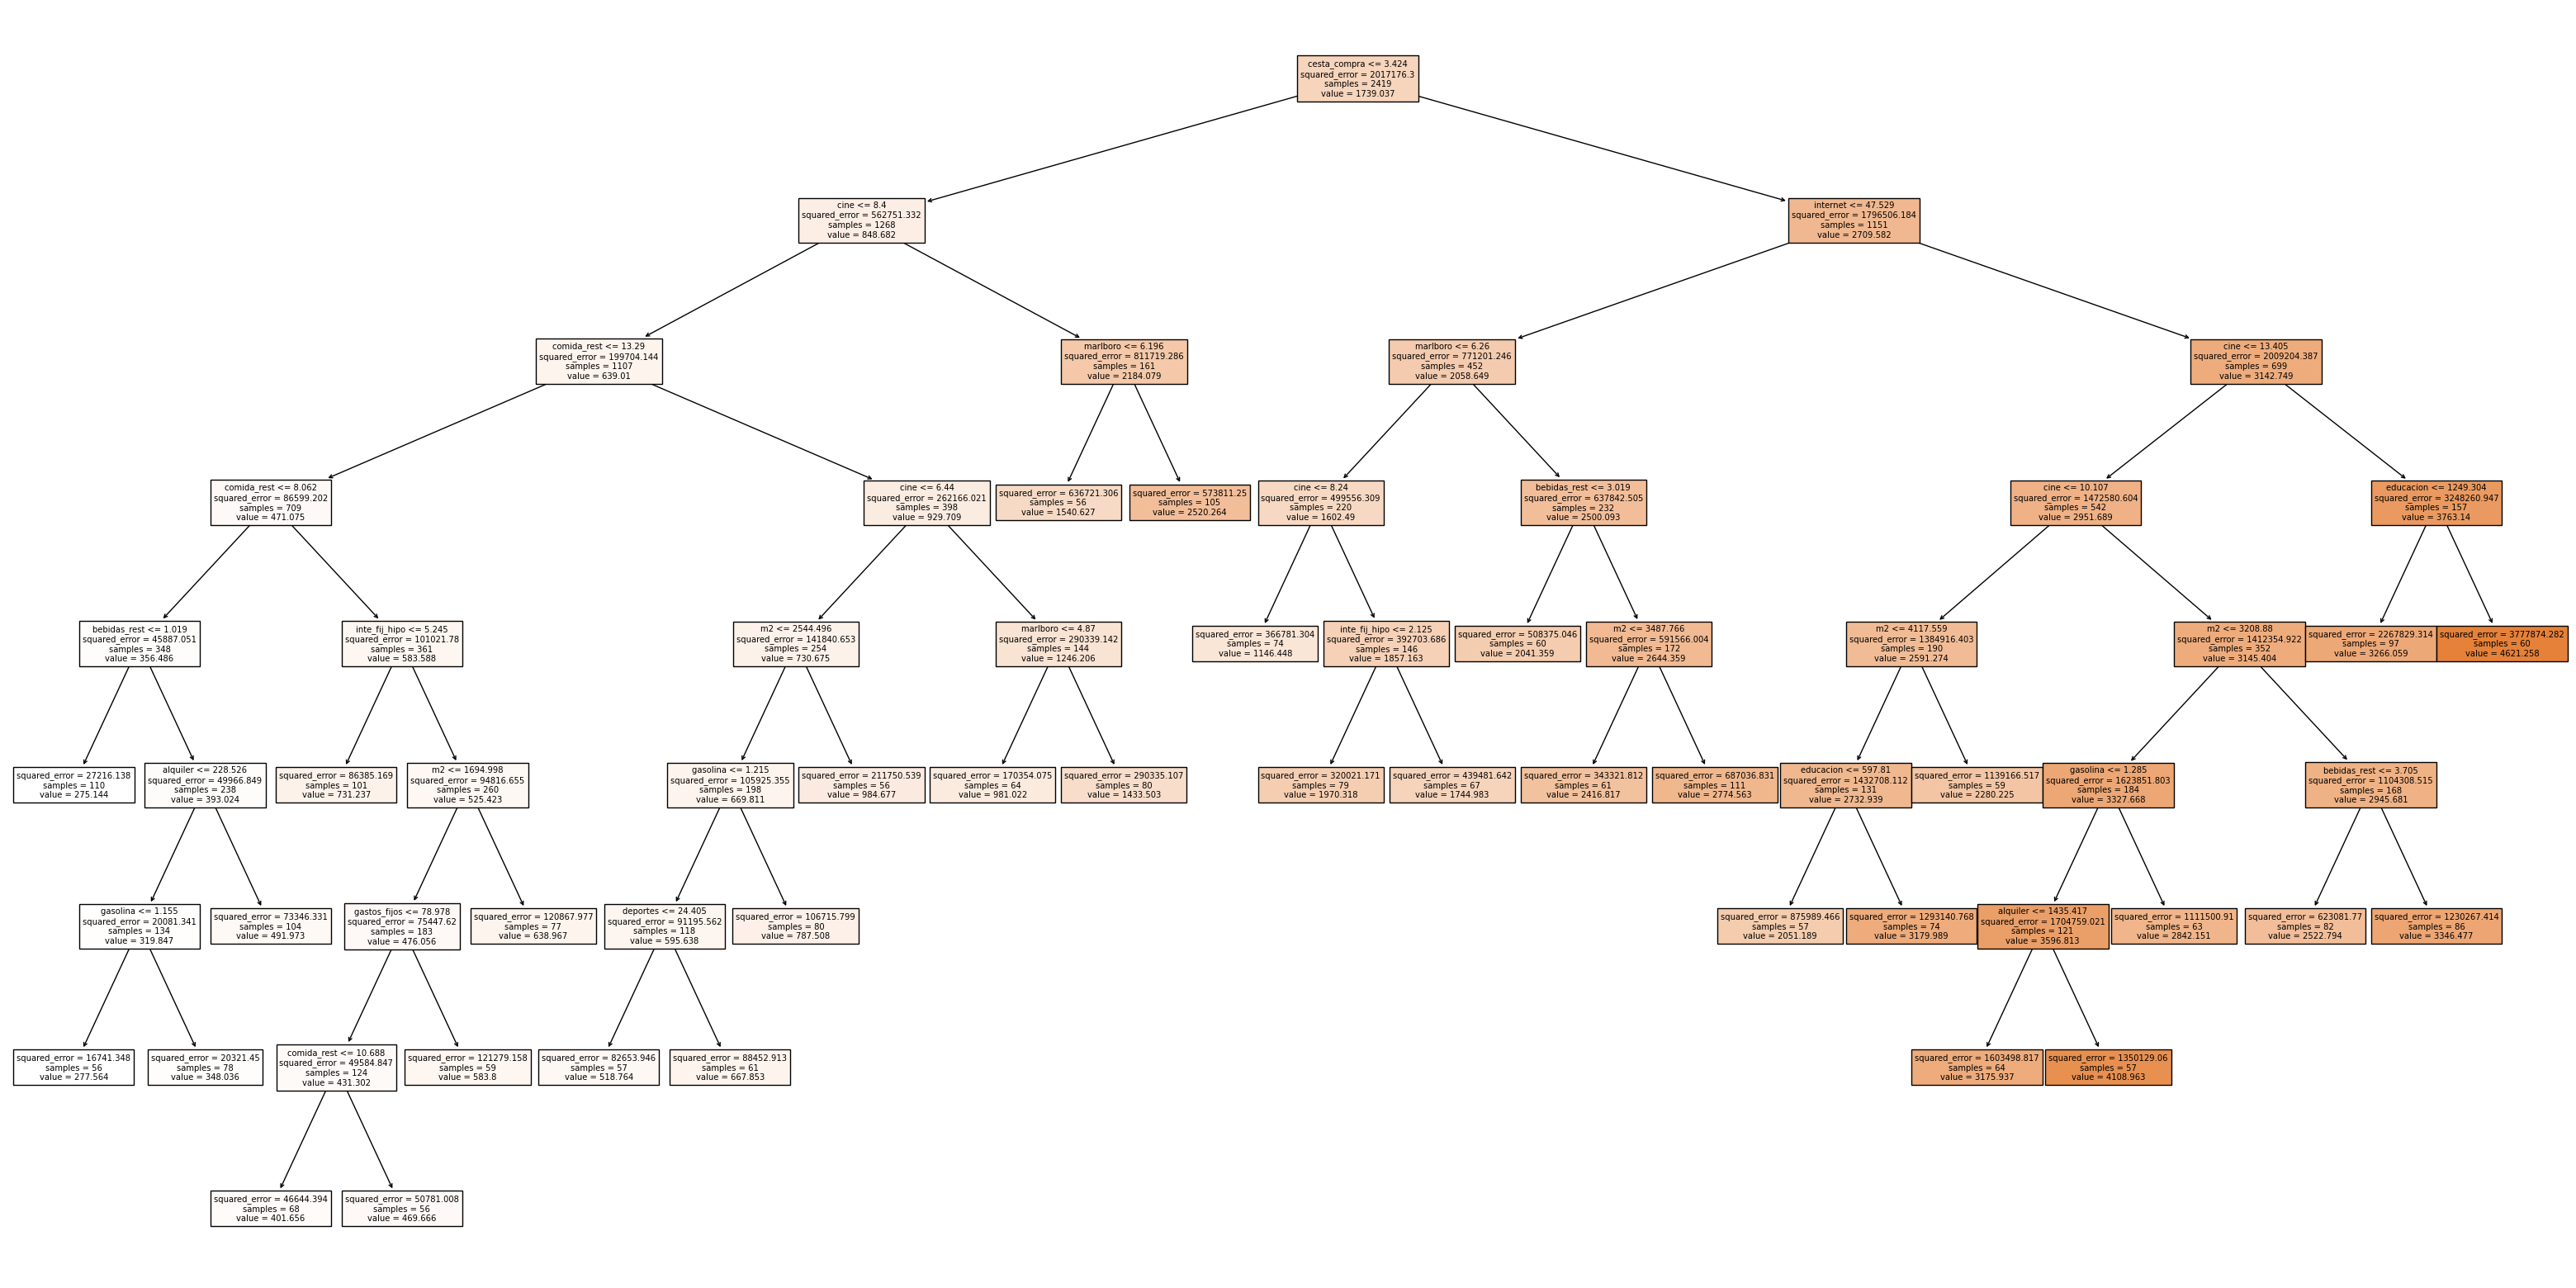

  0%|          | 0/100 [00:03<?, ?it/s]


In [17]:
for arbol in tqdm(bosque):
    fig = plt.figure(figsize=(40, 20))
    tree.plot_tree(arbol, feature_names= list(x_train.columns), filled = True)
    plt.savefig("../graficas/12_random_forest.png")
    plt.show()
    break

In [18]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [19]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [20]:
results_forest = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
results_forest

,MAE,MSE,RMSE,R2,set,modelo
0,520.211739,735136.179976,857.400828,0.66259,test,Random Forest
1,487.900286,592830.693090,769.954994,0.71846,train,Random Forest


In [21]:
results_tree = pd.read_pickle("../data/df_results_tree.pkl")
results_tree

,MAE,MSE,RMSE,R2,set,modelo
0,7.348614e+02,1.419781e+06,1.191545e+03,0.348355,test,Decission Tree I
1,5.938200e-17,1.350190e-29,3.674494e-15,1.000000,train,Decission Tree I
0,5.634823e+02,8.665823e+05,9.309040e+02,0.602260,test,Decision tree VI
1,5.097242e+02,6.421407e+05,8.013368e+02,0.695042,train,Decision tree VI


In [22]:
df_results_tree_forest = pd.concat([results_tree, results_forest]).reset_index(drop=True)
df_results_tree_forest

,MAE,MSE,RMSE,R2,set,modelo
0,7.348614e+02,1.419781e+06,1.191545e+03,0.348355,test,Decission Tree I
1,5.938200e-17,1.350190e-29,3.674494e-15,1.000000,train,Decission Tree I
2,5.634823e+02,8.665823e+05,9.309040e+02,0.602260,test,Decision tree VI
3,5.097242e+02,6.421407e+05,8.013368e+02,0.695042,train,Decision tree VI
4,5.202117e+02,7.351362e+05,8.574008e+02,0.662590,test,Random Forest
5,4.879003e+02,5.928307e+05,7.699550e+02,0.718460,train,Random Forest


In [23]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
6,cine,0.297431
7,marlboro,0.174388
15,alquiler,0.170546
2,bebidas_rest,0.142864
3,comida_rest,0.065508
0,cesta_compra,0.058378
8,educacion,0.031177
12,internet,0.015670
16,m2,0.009971
1,bebidas_super,0.009439


/home/adalaber/anaconda3/envs/proyecto3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adalaber/anaconda3/envs/proyecto3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adalaber/anaconda3/envs/proyecto3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


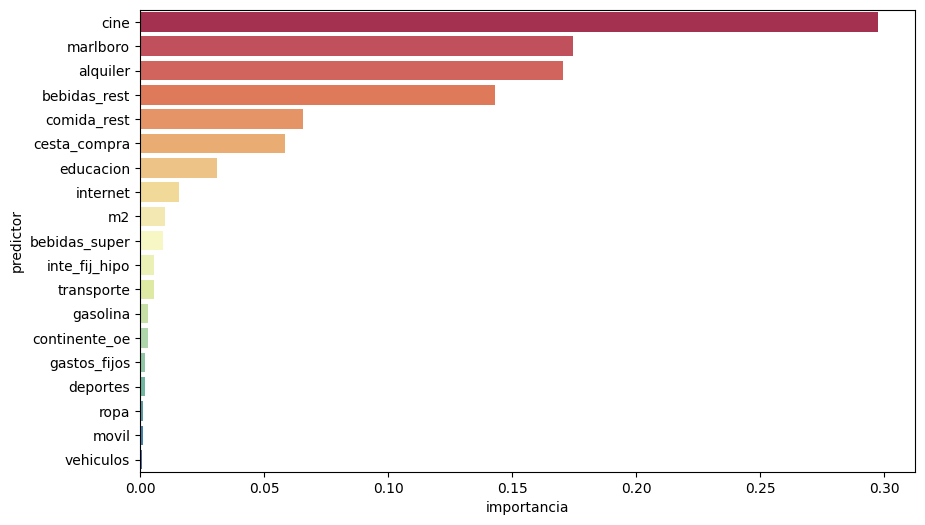

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="Spectral");
plt.savefig("../graficas/12_random_forest_predictores_modelo.png")
plt.show();


En esta gráfica se ve de manera visual que el cine es la variable que más afecta al salario, aunque no llega al 30%, seguido del alquiler y el precio del Marlboro. Aquí podemos inferir que quizá las variables cine y Marlboro afecten al salario porque la mayoría de encuestas se han recgido en entre Europa y América del Norte donde la industria cinematográfca mueve al año 41.000 millones de dólares solo en EEUU.
(https://www.muyinteresante.es/actualidad/38227.html).

Para próximas predicciones sería recomendable nuevas variables como el nivel de estudios, categoría profesional, la edad de los encuestados, el estado político del país y el modelo económico.

In [25]:
df_results_tree_forest.to_pickle("../data/df_results_tree_forest.pkl")